#IS 470 1

---

## BartRider Data Exploration and Decision Tree Classification
<br>
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine if a resident is a rider.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income: 
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>
<br>
**Target variable: Rider**

## 1.Upload and clean data (10 points)

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BartRider.csv to BartRider (1).csv
User uploaded file "BartRider.csv" with length 199121 bytes


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
BartRider = pd.read_csv('BartRider.csv')
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [ ]:
# Examine the number of rows and cols (2 points)
BartRider.shape

(5493, 12)

In [ ]:
# Show the head rows of a data frame (2 points)
BartRider.head()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes


In [ ]:
# Show the tail rows of a data frame (2 points)
BartRider.tail()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No
5492,2,10,N,4,F,1,English,4,2,Parent,2,Yes


In [ ]:
# Examine missing values (2 points)
BartRider.isnull().sum()

Age                      0
DistToWork               0
DualInc                  0
Education                0
Gender                   0
Income                   0
Language                 0
NbrInHouseHold           0
NbrInHouseholdUnder18    0
OwnRent                  0
YrsInArea                0
Rider                    0
dtype: int64

In [ ]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [ ]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [ ]:
# Examine variable type again
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

In [ ]:
# Display all numeric variables (1 point)
BartRider.select_dtypes(include=['number'])

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea
0,7,14,3,3,1,0,5
1,7,10,5,8,2,0,5
2,3,9,3,1,1,0,5
3,1,13,2,1,5,3,5
4,3,14,5,2,3,1,5
...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5
5489,4,9,3,6,3,1,2
5490,2,7,4,2,1,1,1
5491,3,7,3,9,2,0,5


In [ ]:
# Display all categorical variables (1 point)
BartRider.select_dtypes(include=['category'])

,DualInc,Gender,Language,OwnRent,Rider
0,N,F,English,Rent,Yes
1,N,M,English,Own,No
2,N,M,English,Rent,Yes
3,N,M,English,Parent,Yes
4,N,F,English,Parent,Yes
...,...,...,...,...,...
5488,Y,M,English,Own,Yes
5489,Y,F,English,Rent,Yes
5490,N,M,English,Rent,Yes
5491,Y,F,English,Own,No


## 2.Code for exploring a single variable (10 points)

Text(0.5, 1.0, 'Boxplot of Age in the BartRider data set')

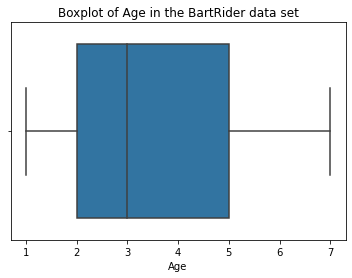

In [ ]:
# Show boxplot of Age variable (1 point)
snsplot = sns.boxplot(x='Age', data = BartRider)
snsplot.set_title("Boxplot of Age in the BartRider data set")

Text(0.5, 1.0, 'Boxplot of Education in the BartRider data set')

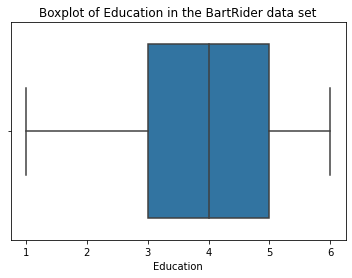

In [ ]:
# Show boxplot of Education variable (1 point)
snsplot = sns.boxplot(x='Education', data = BartRider)
snsplot.set_title("Boxplot of Education in the BartRider data set")

Text(0.5, 1.0, 'Histogram of Income in the BartRider data set')

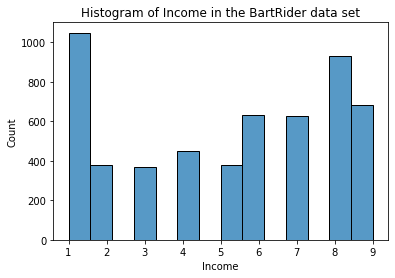

In [ ]:
# Show histogram of Income variable (1 point)
snsplot = sns.histplot(x='Income', data = BartRider)
snsplot.set_title("Histogram of Income in the BartRider data set")

Text(0.5, 1.0, 'Histogram of Distance To Work in the BartRider data set')

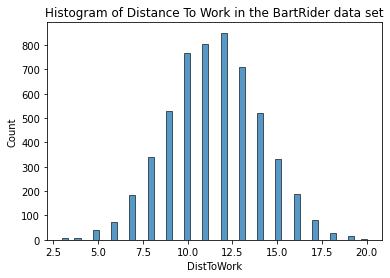

In [ ]:
# Show histogram of DistToWork variable (1 point)
snsplot = sns.histplot(x='DistToWork', data = BartRider)
snsplot.set_title("Histogram of Distance To Work in the BartRider data set")

In [ ]:
# Calculate IQR of NbrInHouseHold variable (1 point)
IQR = BartRider['NbrInHouseHold'].quantile(0.75) - BartRider['NbrInHouseHold'].quantile(0.25)
print("IQR:", IQR)

IQR: 2.0


In [ ]:
# Calculate IQR of DistToWork variable (1 point)
IQR = BartRider['DistToWork'].quantile(0.75) - BartRider['DistToWork'].quantile(0.25)
print("IQR:", IQR)

IQR: 3.0


In [ ]:
# For Gender variable, show the number of instances (count) in each category (1 point)
BartRider['Gender'].value_counts()

F    2958
M    2535
Name: Gender, dtype: int64

In [ ]:
# For Rider variable, show the number of instances (count) in each category (1 point)
BartRider['Rider'].value_counts()

No     3139
Yes    2354
Name: Rider, dtype: int64

Text(0.5, 1.0, 'countplot of Gender in the BartRider data set')

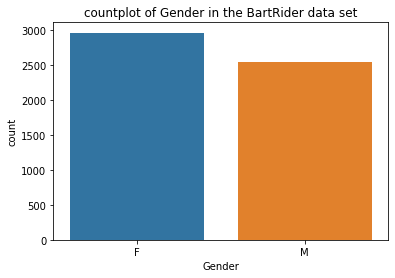

In [ ]:
# Show countplot of Gender variable (1 point)
snsplot = sns.countplot(x='Gender', data=BartRider)
snsplot.set_title("countplot of Gender in the BartRider data set")

Text(0.5, 1.0, 'countplot of Rider in the BartRider data set')

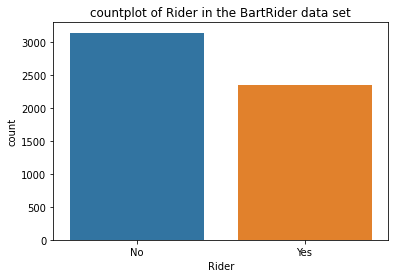

In [ ]:
# Show countplot of Rider variable (1 point)
snsplot = sns.countplot(x='Rider', data=BartRider)
snsplot.set_title("countplot of Rider in the BartRider data set")

## 3.Code to understand relationships amongst multiple variables (10 points)

In [ ]:
# Display correlations for DistToWork and NbrInHouseHold. (2.5 points)
BartRider[['DistToWork','NbrInHouseHold']].corr()

,DistToWork,NbrInHouseHold
DistToWork,1.000000,0.009121
NbrInHouseHold,0.009121,1.000000


In [ ]:
# Display correlations for all numeric variables. (2.5 points)
BartRider.corr()

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea
Age,1.000000,0.002148,0.407692,0.417787,-0.342225,-0.319858,0.173433
DistToWork,0.002148,1.000000,0.009714,0.036000,0.009121,0.011459,0.015747
Education,0.407692,0.009714,1.000000,0.505920,-0.289605,-0.297774,-0.068012
Income,0.417787,0.036000,0.505920,1.000000,-0.109310,-0.142618,0.088785
NbrInHouseHold,-0.342225,0.009121,-0.289605,-0.109310,1.000000,0.710546,0.072916
NbrInHouseholdUnder18,-0.319858,0.011459,-0.297774,-0.142618,0.710546,1.000000,0.065442
YrsInArea,0.173433,0.015747,-0.068012,0.088785,0.072916,0.065442,1.000000


Text(0.5, 1.0, 'Boxplot of Income based on Rider type')

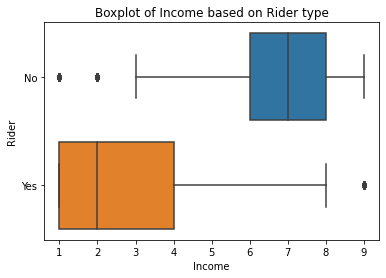

In [ ]:
# Show a boxplot of Income based on the value of Rider variable (Rider = Yes or No). (2.5 points)
snsplot = sns.boxplot(x='Income', y= 'Rider', data = BartRider)
snsplot.set_title("Boxplot of Income based on Rider type")

Text(0.5, 1.0, 'Boxplot of Income based on Female Riders')

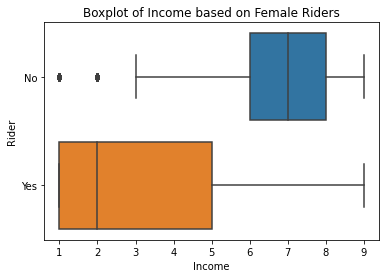

In [ ]:
# Show a boxplot of Income based on the value of Rider variable for only Female. (2.5 points)
snsplot = sns.boxplot(x='Income', y= 'Rider', data = BartRider[BartRider['Gender']=='F'])
snsplot.set_title("Boxplot of Income based on Female Riders")

## 4.Data partitioning and inspection code (10 points)

In [ ]:
# Create dummy variables for DualInc, Gender, Language, and OwnRent	(3 points)
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,Rider,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,7,14,3,3,1,0,5,Yes,0,0,0,0,0,1
1,7,10,5,8,2,0,5,No,0,1,0,0,0,0
2,3,9,3,1,1,0,5,Yes,0,1,0,0,0,1
3,1,13,2,1,5,3,5,Yes,0,1,0,0,1,0
4,3,14,5,2,3,1,5,Yes,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,Yes,1,1,0,0,0,0
5489,4,9,3,6,3,1,2,Yes,1,0,0,0,0,1
5490,2,7,4,2,1,1,1,Yes,0,1,0,0,0,1
5491,3,7,3,9,2,0,5,No,1,0,0,0,0,0


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (3 points)
target = BartRider['Rider']
predictors = BartRider.drop(['Rider'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(3845, 13) (1648, 13) (3845,) (1648,)


In [ ]:
# Examine the proportion of target variable for training data set (2 points)
print(target_train.value_counts(normalize=True))

No     0.579714
Yes    0.420286
Name: Rider, dtype: float64


In [ ]:
# Examine the proportion of target variable for testing data set (2 points)
print(target_test.value_counts(normalize=True))

No     0.552184
Yes    0.447816
Name: Rider, dtype: float64


## 5.Simple decision tree training and testing. (10 points)

In [ ]:
# Build a decision tree model on training data. Set criterion = "entropy", random_state = 1, max_depth = 2 (3 points)
model = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(837.0, 906.0, 'Income <= 4.5\nentropy = 0.982\nsamples = 3845\nvalue = [2229, 1616]\nclass = No'),
 Text(418.5, 543.6, 'OwnRent_Parent <= 0.5\nentropy = 0.721\nsamples = 1562\nvalue = [312, 1250]\nclass = Yes'),
 Text(209.25, 181.19999999999993, 'entropy = 0.912\nsamples = 846\nvalue = [277, 569]\nclass = Yes'),
 Text(627.75, 181.19999999999993, 'entropy = 0.282\nsamples = 716\nvalue = [35, 681]\nclass = Yes'),
 Text(1255.5, 543.6, 'OwnRent_Parent <= 0.5\nentropy = 0.635\nsamples = 2283\nvalue = [1917, 366]\nclass = No'),
 Text(1046.25, 181.19999999999993, 'entropy = 0.433\nsamples = 2014\nvalue = [1835, 179]\nclass = No'),
 Text(1464.75, 181.19999999999993, 'entropy = 0.887\nsamples = 269\nvalue = [82, 187]\nclass = Yes')]

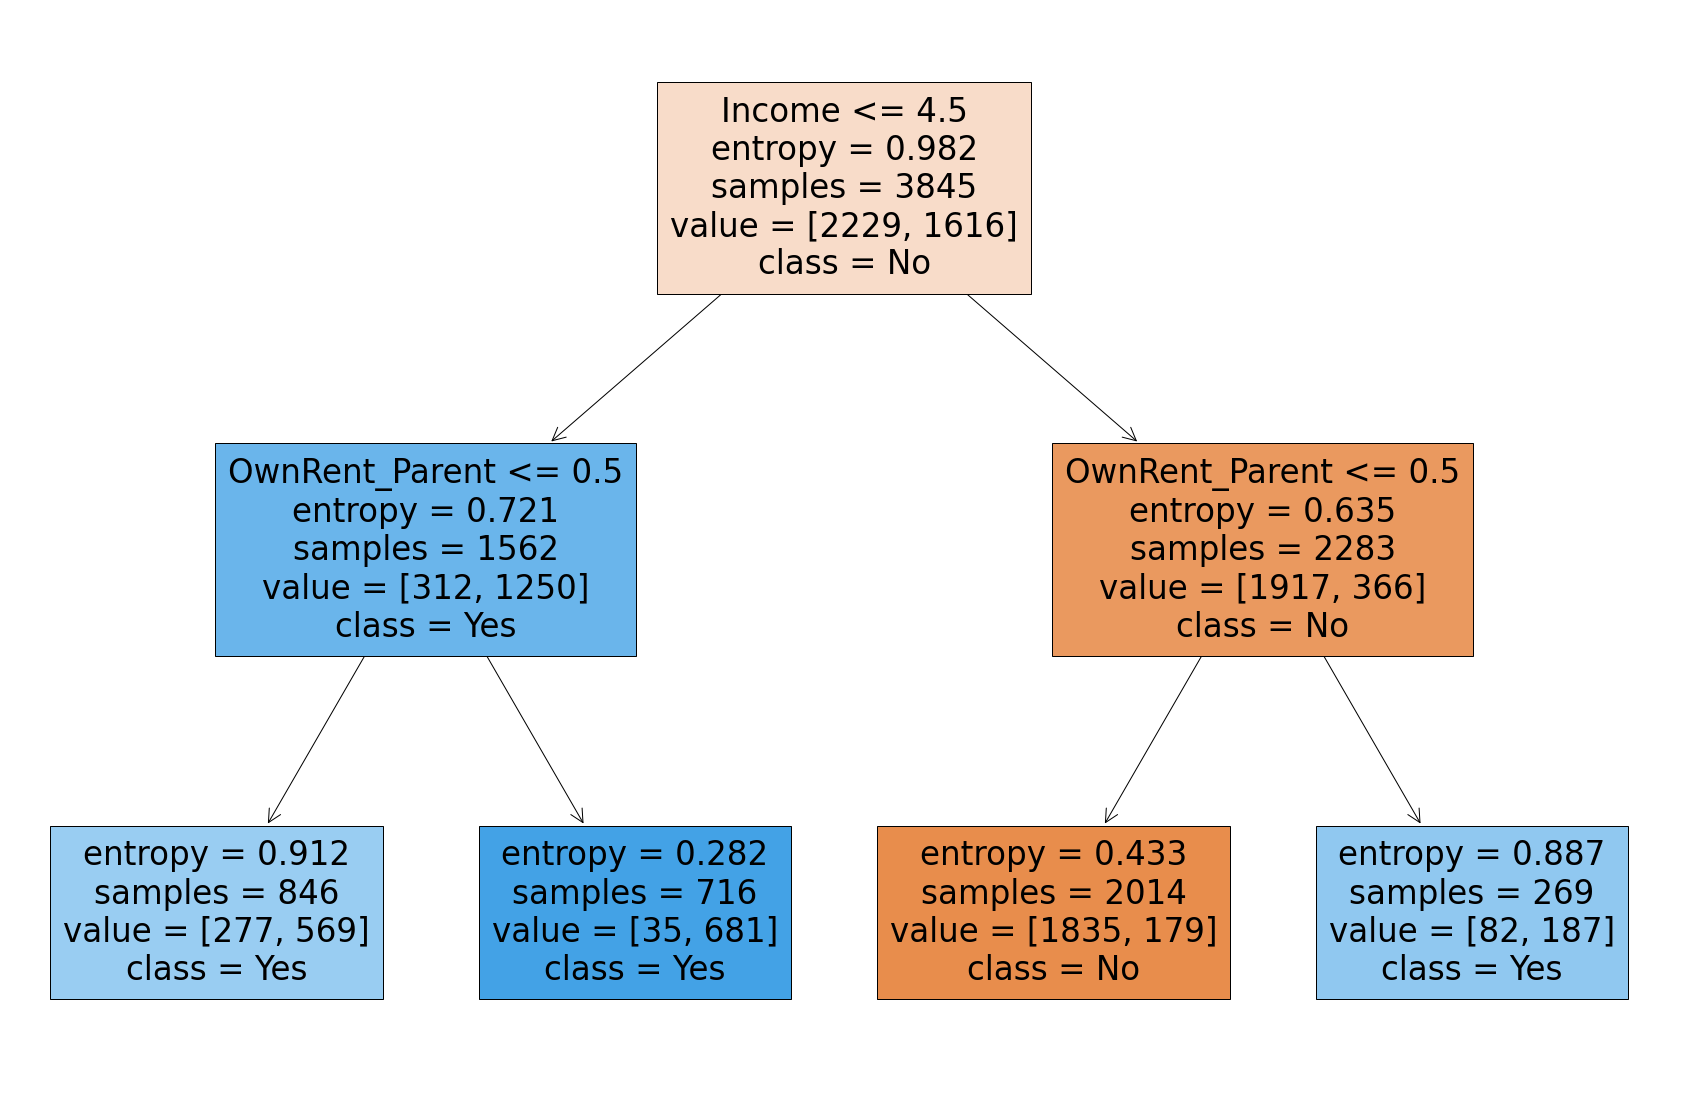

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, 
               feature_names=list(predictors_train.columns),  
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(predictors_train.columns)))

|--- Income <= 4.50
|   |--- OwnRent_Parent <= 0.50
|   |   |--- class: Yes
|   |--- OwnRent_Parent >  0.50
|   |   |--- class: Yes
|--- Income >  4.50
|   |--- OwnRent_Parent <= 0.50
|   |   |--- class: No
|   |--- OwnRent_Parent >  0.50
|   |   |--- class: Yes



Q1. For a resident with income = 5 and OwnRen = Rent, what is the prediction result? (2 points) <br>The prediction result is "No"


In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model.predict(predictors_test)

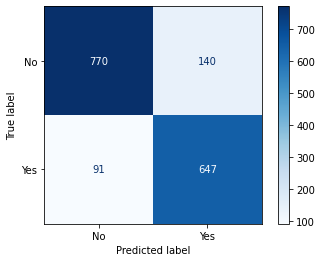

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

Q2. How many residents in the testing set are predicted incorrectly? (2 points) <br>
91+140 = 231

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.85      0.87       910
         Yes       0.82      0.88      0.85       738

    accuracy                           0.86      1648
   macro avg       0.86      0.86      0.86      1648
weighted avg       0.86      0.86      0.86      1648





---


***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_homework1.ipynb file***
2.   ***Upload the IS470_homework1.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_homework1.ipynb

[NbConvertApp] Converting notebook IS470_homework1.ipynb to html
[NbConvertApp] Writing 681902 bytes to IS470_homework1.html
